<a href="https://colab.research.google.com/github/IvanFP26/MachineLearning/blob/main/UTS/UTS_ML_K_Means_GPUBenchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**UTS MACHINE LEARNING Clustering K-Means using GPU Benchmark Dataset**

**Nama : Ivan Fernanda Prayoga**

**NIM  : 1103204035**

**Dataset : [GPU Benchmark](https://www.kaggle.com/datasets/alanjo/graphics-card-full-specs)**

**Model   : Clustering K-Means**




**Clustering K-Means**

Clustering K-Means adalah salah satu algoritma clustering yang umum digunakan dalam analisis data dan machine learning. Tujuannya adalah mengelompokkan data ke dalam beberapa kelompok atau cluster berdasarkan kesamaan fitur dan meminimalkan varian dalam setiap kelompok dan memaksimalkan varian antara kelompok. Algoritma ini bekerja dengan cara mengelompokkan data ke dalam k kelompok berdasarkan jarak antara titik data.

#**Load Dataset GPU Benchmark**

Prompt : Beri kode untuk membaca dataset dari google drive di google colab
* Menggunakan library google.colab untuk mengakses Google Drive. Library google.colab berguna untuk menulis dan menjalankan kode Python di browser tanpa perlu mengatur lingkungan pengembangan secara lokal di komputer kita, sehingga memudahkan kita untuk mengakses file dan dataset yang disimpan di Google Drive.
* Menggunakan drive.mount('/content/drive') untuk menghubungkan Google Drive dengan Google Colab.
* Menentukan path (alamat) ke file dataset yang ingin dibaca di Google Drive. Dengan path '/content/drive/MyDrive/Machine Learning/gpu_specs_v6.csv' yang sesuai dengan struktur folder dan nama file.
* Menggunakan library pandas untuk membaca dataset dengan fungsi read_csv(). Data akan disimpan dalam objek DataFrame yang disebut df. Library Pandas Berguna untuk manipulasi dan analisis data.
* Mencetak beberapa baris pertama dari dataset menggunakan print(df.head()) untuk memastikan bahwa data telah berhasil dibaca.



In [1]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Path ke file dataset di Google Drive
file_path = '/content/drive/MyDrive/Machine Learning/gpu_specs_v6.csv'

# Baca dataset menggunakan pandas
df = pd.read_csv(file_path)

# Tampilkan data
df

Mounted at /content/drive


,manufacturer,productName,releaseYear,memSize,memBusWidth,gpuClock,memClock,unifiedShader,tmu,rop,pixelShader,vertexShader,igp,bus,memType,gpuChip
0,NVIDIA,GeForce RTX 4050,2023.0,8.000,128.0,1925,2250.0,3840.0,120,48,NaN,NaN,No,PCIe 4.0 x16,GDDR6,AD106
1,Intel,Arc A350M,2022.0,4.000,64.0,300,1500.0,768.0,48,24,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
2,Intel,Arc A370M,2022.0,4.000,64.0,300,1500.0,1024.0,64,32,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
3,Intel,Arc A380,2022.0,4.000,64.0,300,1500.0,1024.0,64,32,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
4,Intel,Arc A550M,2022.0,8.000,128.0,300,1500.0,2048.0,128,64,NaN,NaN,No,PCIe 4.0 x16,GDDR6,DG2-512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2884,3dfx,Voodoo5 5000 AGP,NaN,0.016,128.0,166,166.0,NaN,2,2,2.0,0.0,No,AGP 4x,SDR,VSA-100
2885,3dfx,Voodoo5 5000 PCI,NaN,0.016,128.0,166,166.0,NaN,2,2,2.0,0.0,No,PCI,SDR,VSA-100
2886,3dfx,Voodoo5 6000,NaN,0.032,128.0,166,166.0,NaN,2,2,2.0,0.0,No,AGP 4x,SDR,VSA-100
2887,Intel,Xe DG1,NaN,4.000,128.0,900,2133.0,640.0,40,20,NaN,NaN,No,PCIe 4.0 x8,LPDDR4X,DG1


Output : Melihat isi dari Dataset melalui DataFrame yang berisi 2889 baris dan 16 kolom.

**Penjelasan setiap kolom dataset :**

Manufacturer (Pabrikan): Menunjukkan nama perusahaan atau pabrikan yang memproduksi kartu grafis tersebut.

ProductName (Nama Produk): Nama atau model dari kartu grafis tersebut.

ReleaseYear (Tahun Rilis): Menunjukkan tahun di mana kartu grafis tersebut dirilis atau diluncurkan ke pasar.

MemSize (Ukuran Memori): Menyatakan kapasitas total memori yang dimiliki oleh kartu grafis.

MemBusWidth (Lebar Bus Memori): Merupakan lebar bus data yang digunakan untuk menghubungkan GPU dengan memori. Diukur dalam bit.

GPUClock (Frekuensi GPU): Menyatakan kecepatan clock (frekuensi operasional) dari GPU.

MemClock (Frekuensi Memori): Menunjukkan kecepatan clock dari memori kartu grafis.

UnifiedShader: Jumlah shader yang terintegrasi atau digunakan dalam GPU secara keseluruhan.

TMU (Texture Mapping Unit): Jumlah unit pemrosesan tekstur yang digunakan oleh GPU.

ROP (Raster Operations Pipeline): Jumlah unit pemrosesan Raster yang digunakan oleh GPU.

PixelShader: Jumlah unit shader khusus untuk pemrosesan piksel (pixel) dalam GPU.

VertexShader: Jumlah unit shader khusus untuk pemrosesan vertex dalam GPU.

IGP (Integrated Graphics Processor): Menunjukkan apakah kartu grafis tersebut memiliki prosesor grafis terintegrasi atau tidak.

Bus: Jenis dan kecepatan bus yang digunakan oleh kartu grafis.

MemType (Tipe Memori): Menunjukkan jenis memori yang digunakan oleh kartu grafis, seperti GDDR5, GDDR6, HBM, dll.

GPUChip: Nama atau kode chip GPU yang digunakan dalam kartu grafis tersebut.

# **EDA (Exploratory Data Analysis)**

Prompt : Beri kode untuk melakukan exploratory data analysis serta beri penjelasan tentang model tersebut

Dalam EDA, kita menggunakan visualisasi dan statistik deskriptif untuk memahami dataset yang akan kita analisis. Dengan memahami karakteristik dataset, kita dapat mengidentifikasi pola, anomali, dan hubungan antara variabel. Hal ini membantu kita dalam pemrosesan data lebih lanjut, pemilihan fitur, dan pemodelan.

In [2]:
import matplotlib.pyplot as plt

Matplotlib adalah salah satu library populer dalam bahasa pemrograman Python yang digunakan untuk membuat visualisasi data. Library ini menyediakan berbagai fungsi dan metode untuk membuat berbagai jenis plot, seperti line plot, scatter plot, bar plot, histogram, dan masih banyak lagi. Matplotlib dapat digunakan untuk menghasilkan visualisasi yang informatif dan menarik dari data.

In [3]:
# Melihat informasi umum tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2889 entries, 0 to 2888
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   manufacturer   2889 non-null   object 
 1   productName    2889 non-null   object 
 2   releaseYear    2845 non-null   float64
 3   memSize        2477 non-null   float64
 4   memBusWidth    2477 non-null   float64
 5   gpuClock       2889 non-null   int64  
 6   memClock       2477 non-null   float64
 7   unifiedShader  2065 non-null   float64
 8   tmu            2889 non-null   int64  
 9   rop            2889 non-null   int64  
 10  pixelShader    824 non-null    float64
 11  vertexShader   824 non-null    float64
 12  igp            2889 non-null   object 
 13  bus            2889 non-null   object 
 14  memType        2889 non-null   object 
 15  gpuChip        2889 non-null   object 
dtypes: float64(7), int64(3), object(6)
memory usage: 361.2+ KB


Output : Melihat informasi umum tentang

Jumlah Baris dan Kolom (Entries dan Columns): Output akan memberikan informasi tentang jumlah baris (entries) dan kolom dalam DataFrame.

Nama Kolom dan Tipe Data (Dtype): Setiap kolom DataFrame akan ditampilkan dengan namanya dan tipe datanya, seperti int64, float64, atau object.

Jumlah Nilai Non-null (Non-Null Count): Output akan menunjukkan berapa banyak nilai non-null (tidak bernilai null) yang ada di setiap kolom.

In [4]:
# Melihat beberapa baris pertama dari dataset
df.head()

,manufacturer,productName,releaseYear,memSize,memBusWidth,gpuClock,memClock,unifiedShader,tmu,rop,pixelShader,vertexShader,igp,bus,memType,gpuChip
0,NVIDIA,GeForce RTX 4050,2023.0,8.0,128.0,1925,2250.0,3840.0,120,48,NaN,NaN,No,PCIe 4.0 x16,GDDR6,AD106
1,Intel,Arc A350M,2022.0,4.0,64.0,300,1500.0,768.0,48,24,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
2,Intel,Arc A370M,2022.0,4.0,64.0,300,1500.0,1024.0,64,32,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
3,Intel,Arc A380,2022.0,4.0,64.0,300,1500.0,1024.0,64,32,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
4,Intel,Arc A550M,2022.0,8.0,128.0,300,1500.0,2048.0,128,64,NaN,NaN,No,PCIe 4.0 x16,GDDR6,DG2-512


Output : Melihat 5 baris pertama dari dataset melalui DataFrame.

In [5]:
# Statistik deskriptif
df.describe()

,releaseYear,memSize,memBusWidth,gpuClock,memClock,unifiedShader,tmu,rop,pixelShader,vertexShader
count,2845.000000,2477.000000,2477.000000,2889.000000,2477.000000,2065.000000,2889.000000,2889.000000,824.000000,824.000000
mean,2010.691388,3.113803,274.874445,661.126687,868.578119,1032.937530,47.429214,18.750087,6.739078,2.622573
std,6.193125,7.175399,653.163896,374.481450,509.987396,1662.834618,73.014849,25.067896,8.091586,2.579388
min,1986.000000,0.000032,32.000000,10.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,0.256000,128.000000,400.000000,400.000000,144.000000,8.000000,4.000000,2.000000,0.000000
50%,2011.000000,1.024000,128.000000,600.000000,837.000000,384.000000,20.000000,8.000000,4.000000,2.000000
75%,2015.000000,3.000000,256.000000,875.000000,1250.000000,1280.000000,56.000000,24.000000,8.000000,4.000000
max,2023.000000,128.000000,8192.000000,2331.000000,2257.000000,17408.000000,880.000000,256.000000,48.000000,24.000000


Output : Mendapatkan statistik deskriptif dari kolom-kolom numerik dalam dataset, seperti jumlah, rata-rata, standar deviasi, nilai minimum, kuartil, dan nilai maksimum.

Count: Jumlah total data (non-null) pada setiap kolom.

Mean (Rata-rata): Nilai rata-rata dari data pada setiap kolom.

Std (Standar Deviasi): Ukuran sejauh mana nilai-nilai dalam kolom tersebar dari rata-ratanya.

Min (Minimum): Nilai minimum dalam setiap kolom yaitu nilai terendah.

25%, 50%, 75% (Kuartil): Kuartil adalah nilai yang membagi data menjadi empat bagian sama besar. Kuartil pertama (25%) adalah nilai di mana 25% data lebih rendah, median (50%) adalah nilai tengah data, dan kuartil ketiga (75%) adalah nilai di mana 75% data lebih rendah.

Max (Maksimum): Nilai maksimum dalam setiap kolom yaitu nilai tertinggi.

Prompt : Beri kode untuk memeriksa jumlah data yang hilang dalam setiap kolom

In [6]:
# Periksa jumlah data yang hilang (NaN) dalam setiap kolom
missing_data = df.isnull().sum()

# Tampilkan data yang hilang
print(missing_data)

manufacturer        0
productName         0
releaseYear        44
memSize           412
memBusWidth       412
gpuClock            0
memClock          412
unifiedShader     824
tmu                 0
rop                 0
pixelShader      2065
vertexShader     2065
igp                 0
bus                 0
memType             0
gpuChip             0
dtype: int64


Output : Memeriksa jumlah data yang hilang dalam setiap kolom

Prompt : Beri kode untuk menghapus baris dengan nilai NaN pada kolom 'releaseYear', 'gpuClock', 'memClock'

In [7]:
# Menghapus baris dengan nilai NaN pada kolom tertentu
kolom_nan = ['releaseYear', 'gpuClock', 'memClock']
df.dropna(subset=kolom_nan, inplace=True)

Output : Menghapus baris dengan nilai NaN pada kolom tertentu

#**Data Visualization**


Data Visualization adalah representasi grafis dari informasi dan data menggunakan elemen visual seperti grafik, diagram, dan peta. Tujuan utamanya adalah untuk membantu memahami pola, tren, dan hubungan dalam data dengan cara yang lebih intuitif dan mudah dicerna. Data visualization dapat digunakan untuk mewakili berbagai jenis data, termasuk numerik, kategorikal, temporal, dan spasial.

Dengan melakukan visualisasi data untuk setiap fitur, kita dapat memperoleh pemahaman yang lebih baik tentang karakteristik dan distribusi data dalam dataset. Plot yang dihasilkan memungkinkan kita untuk melihat pola, tren, dan anomali dalam setiap fitur.


**Metode Elbow**

Prompt : Beri kode untuk implementasi metode elbow dalam menentukan jumlah kluster pada kolom 'releaseYear', 'gpuClock', 'memClock' dengan melakukan iterasi untuk jumlah kluster 1 sampai 10

Metode Elbow digunakan untuk menentukan jumlah klaster optimal dalam analisis klaster. Dalam metode ini, variasi yang dijelaskan oleh klaster diplot sebagai fungsi dari jumlah klaster. Variasi ini biasanya diukur sebagai jumlah kuadrat jarak dari setiap titik data ke pusat klaster terdekat.

Library sklearn.cluster digunakan untuk memanfaatkan fungsionalitas algoritma K-Means yang sudah tersedia dalam scikit-learn untuk melakukan analisis klastering pada data kita dengan mudah dan efisien.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

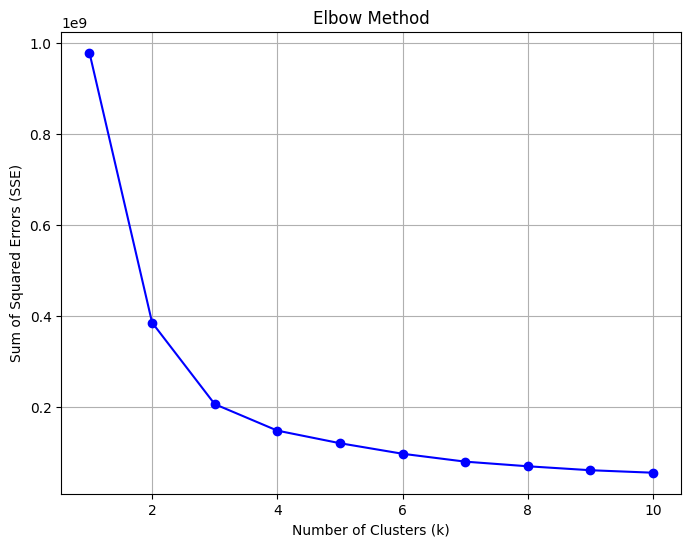

In [8]:
from sklearn.cluster import KMeans

# Mengambil kolom yang akan digunakan untuk klastering
data = df[['releaseYear', 'gpuClock', 'memClock']]

# Menyimpan nilai SSE (Sum of Squared Errors) untuk berbagai jumlah kluster (k) dari 1 hingga 10
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

# Membuat plot elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()

Output : **Grafik metode Elbow**

Pada grafik metode Elbow menentukan jumlah kluster optimal.

Pada sumbu x, memiliki “Number of Cluster (k)” dan pada sumbu y, memiliki “Sum of Squared Errors (SSE)”. Grafik menunjukkan bahwa ketika k = 4, terjadi penurunan tajam dalam SSE. Ini menunjukkan bahwa 4 adalah jumlah kluster optimal.

Metode Elbow ini bekerja dengan cara memplot SSE untuk berbagai jumlah kluster (k), dan memilih nilai k di mana penurunan SSE mulai melambat secara signifikan. Dalam hal ini, terletak pada k = 4, sehingga 4 adalah jumlah kluster optimal.

#**Training K-Means**

Training K-Means Clustering merujuk pada proses di mana algoritma k-means mempelajari struktur data dan menghasilkan pusat-pusat kluster. Proses ini melibatkan dua langkah utama: inisialisasi pusat kluster dan iterasi untuk memperbarui pusat kluster dan mengelompokkan data.

**K-Means Clustering**

Prompt : Beri kode untuk implementasi pada kolom 'gpuClock' dan 'memClock'

K-means clustering adalah algoritma yang digunakan untuk mengelompokkan data menjadi beberapa kluster berdasarkan kesamaan karakteristik. Tujuan utama dari k-means clustering adalah meminimalkan varian intra-kluster dan memaksimalkan varian antar-kluster. Algoritma ini termasuk dalam kategori unsupervised learning, karena tidak memerlukan label kelas untuk melatih model.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


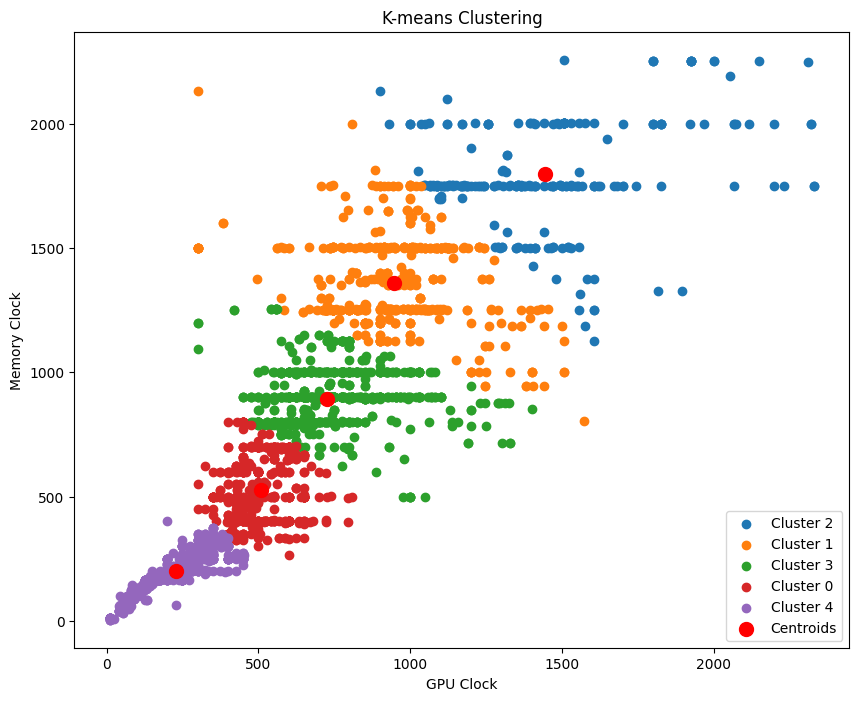

In [9]:
kmeans = KMeans(n_clusters=5, random_state=0)
df['label'] = kmeans.fit_predict(data)

# Visualisasi hasil klastering
plt.figure(figsize=(10, 8))

# Menggunakan scatter plot untuk memvisualisasikan data dalam setiap kluster
for label in df['label'].unique():
    cluster_data = df[df['label'] == label]
    plt.scatter(cluster_data['gpuClock'], cluster_data['memClock'], label=f'Cluster {label}')

# Menambahkan centroid kluster
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=100, c='red', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('GPU Clock')
plt.ylabel('Memory Clock')
plt.legend()
plt.show()

Output : **K-Means Clustering**

Plot yang dihasilkan akan menunjukkan scatter plot di mana setiap titik diwarnai sesuai dengan klaster yang ditetapkan. Anda akan melihat lima klaster yang berbeda, dan titik-titik merah mewakili pusat-pusat massa klaster tersebut. Sumbu x mewakili 'GPU Clock', sumbu y mewakili 'Memory Clock', dan setiap klaster diberi label. Plot ini memberikan representasi visual tentang bagaimana data dikelompokkan ke dalam klaster berdasarkan fitur 'gpuClock' dan 'memClock'.

#**Evaluating K-Means**

Evaluasi K-Means clustering merujuk pada penilaian seberapa baik model k-means telah berhasil mengelompokkan data. Evaluasi ini bertujuan untuk mengukur sejauh mana kluster yang dihasilkan sesuai dengan struktur sebenarnya atau karakteristik data yang ada. Beberapa metrik evaluasi umum yang digunakan dalam k-means clustering melibatkan pengukuran seberapa baik objek-objek dalam kluster dan seberapa jauh kluster tersebut terpisah satu sama lain.

**Silhouette Score**

Prompt : Beri kode untuk implementasi Silhouette Score pada variabel "data" dari kluster 2 sampai 10

Silhouette Score adalah metrik evaluasi yang digunakan untuk mengukur seberapa baik suatu objek sesuai dengan kluster tempat objek tersebut berada dalam k-means clustering atau metode clustering lainnya. Metrik ini memberikan gambaran tentang sejauh mana objek-objek dalam suatu kluster berada dalam batas kluster yang tepat dan sejauh mana kluster tersebut terpisah satu sama lain.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

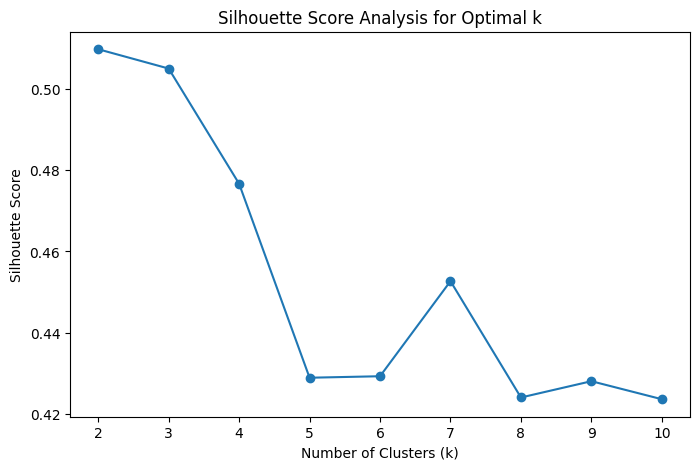

Silhouette Score for k=2: 0.509848772662984
Silhouette Score for k=3: 0.5050816975196247
Silhouette Score for k=4: 0.47667408940315753
Silhouette Score for k=5: 0.42884945874879105
Silhouette Score for k=6: 0.4292172914406291
Silhouette Score for k=7: 0.4526579881138853
Silhouette Score for k=8: 0.42397592956915625
Silhouette Score for k=9: 0.42799385973029613
Silhouette Score for k=10: 0.4235499957400465


In [10]:
from sklearn.metrics import silhouette_score

# Inisialisasi dictionary untuk menyimpan nilai Silhouette Score
silhouette_scores = {}

# Menghitung Silhouette Score untuk setiap nilai k dari 2 hingga 10
range_clusters = range(2, 11)  # Mengganti 'range_clusters' agar sesuai dengan variabel yang digunakan
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    silhouette_scores[k] = silhouette_avg

# Menampilkan grafik hasil analisis Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(list(range_clusters), list(silhouette_scores.values()), marker='o')
plt.title('Silhouette Score Analysis for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Menampilkan nilai Silhouette Score untuk setiap nilai k
for k, silhouette_avg in silhouette_scores.items():
    print(f"Silhouette Score for k={k}: {silhouette_avg}")

Output : **Grafik Silhouette Score**

Jika Silhouette Score mendekati 1, itu menunjukkan bahwa objek dalam suatu kluster berada pada posisi yang sesuai dan terpisah dengan baik dari kluster lainnya.

Jika Silhouette Score mendekati -1, itu menunjukkan bahwa objek mungkin telah di-klasifikasikan ke kluster yang salah.

Jika Silhouette Score mendekati 0, itu menunjukkan adanya tumpang tindih atau ketidakjelasan dalam klaster.

Jadi, berdasarkan Silhouette Score, kluster berada pada posisi yang sesuai dan terpisah dengan baik adalah 2.

**Davies-Bouldin Score**

Prompt : Beri kode untuk implementasi Davies Bouldin pada variabel "data" dari kluster 2 sampai 10

Davies-Bouldin Score adalah metrik evaluasi untuk mengukur seberapa baik suatu kluster terpisah satu sama lain dalam konteks clustering, termasuk k-means clustering. Metrik ini menggambarkan sejauh mana objek dalam suatu kluster mirip dengan objek dalam kluster lainnya.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

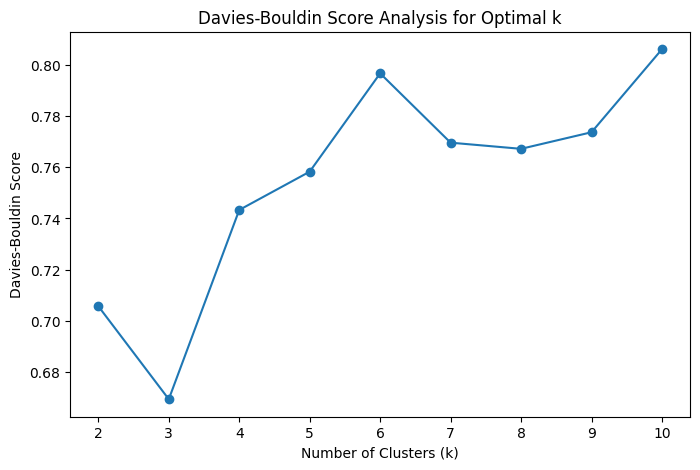

Davies-Bouldin Score for k=2: 0.7057199698598778
Davies-Bouldin Score for k=3: 0.6693790782327277
Davies-Bouldin Score for k=4: 0.7433375324334965
Davies-Bouldin Score for k=5: 0.7583022715963501
Davies-Bouldin Score for k=6: 0.7967168252452983
Davies-Bouldin Score for k=7: 0.7696284199151372
Davies-Bouldin Score for k=8: 0.7672229775408022
Davies-Bouldin Score for k=9: 0.7737027786810434
Davies-Bouldin Score for k=10: 0.8061437941866558


In [11]:
from sklearn.metrics import davies_bouldin_score

# Inisialisasi dictionary untuk menyimpan nilai Davies-Bouldin Index
dbi_scores = {}

# Menghitung Davies-Bouldin Index untuk setiap nilai k dari 2 hingga 10
range_clusters = range(2, 11)  # Mengganti 'range_clusters' agar sesuai dengan variabel yang digunakan
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    dbi = davies_bouldin_score(data, labels)  # Menghitung Davies-Bouldin Index
    dbi_scores[k] = dbi

# Menampilkan grafik hasil analisis Davies-Bouldin Score
plt.figure(figsize=(8, 5))
plt.plot(list(range_clusters), list(dbi_scores.values()), marker='o')  # Mengganti 'davies_bouldin_scores' menjadi 'dbi_scores'
plt.title('Davies-Bouldin Score Analysis for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.show()

# Menampilkan nilai Davies-Bouldin Index untuk setiap nilai k
for k, dbi in dbi_scores.items():
    print(f"Davies-Bouldin Score for k={k}: {dbi}")

Output : **Grafik Davies-Bouldin Score**

Nilai Davies-Bouldin Index yang rendah menunjukkan bahwa klaster berada pada posisi yang baik dan terpisah dengan baik satu sama lain.

Nilai yang tinggi dapat menunjukkan adanya tumpang tindih atau ketidak jelasan antara klaster.

**Calinski-Harabasz Score**

Prompt : Beri kode untuk implementasi Calinski Harabasz pada variabel "data" dari kluster 2 sampai 10

Calinski-Harabasz Score, juga dikenal sebagai Variance Ratio Criterion, adalah metrik evaluasi untuk mengukur kualitas klustering dalam konteks algoritma clustering seperti k-means. Tujuannya adalah untuk memberikan ukuran seberapa baik kluster-kelompok tersebut terpisah satu sama lain dan seberapa padat (compact) kluster-kelompok tersebut.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

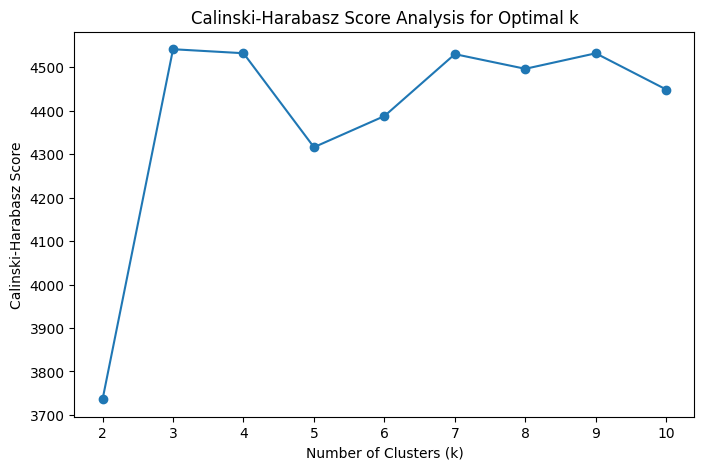

Calinski-Harabasz Score for k=2: 3736.219340215491
Calinski-Harabasz Score for k=3: 4541.27955130534
Calinski-Harabasz Score for k=4: 4532.064245131154
Calinski-Harabasz Score for k=5: 4315.88767714681
Calinski-Harabasz Score for k=6: 4387.503939105752
Calinski-Harabasz Score for k=7: 4529.965465037039
Calinski-Harabasz Score for k=8: 4496.223841457603
Calinski-Harabasz Score for k=9: 4531.923665016659
Calinski-Harabasz Score for k=10: 4448.603579264998


In [12]:
from sklearn.metrics import calinski_harabasz_score

# Inisialisasi dictionary untuk menyimpan nilai Calinski-Harabasz Index
calinski_harabasz_scores = {}

# Menghitung Calinski-Harabasz Index untuk setiap nilai k dari 2 hingga 10
range_clusters = range(2, 11)  # Mengganti 'range_clusters' agar sesuai dengan variabel yang digunakan
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    ch_score = calinski_harabasz_score(data, labels)
    calinski_harabasz_scores[k] = ch_score

# Menampilkan grafik hasil analisis Calinski-Harabasz Score
plt.figure(figsize=(8, 5))
plt.plot(list(range_clusters), list(calinski_harabasz_scores.values()), marker='o')  # Mengganti 'calinski_harabasz_scores' menjadi 'calinski_harabasz_scores'
plt.title('Calinski-Harabasz Score Analysis for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.show()

# Menampilkan nilai Calinski-Harabasz Index untuk setiap nilai k
for k, ch_score in calinski_harabasz_scores.items():
    print(f"Calinski-Harabasz Score for k={k}: {ch_score}")

Output : **Calinski-Harabasz Score**

Nilai yang lebih tinggi menunjukkan bahwa klaster lebih baik dipisahkan satu sama lain.

Sebuah indeks yang lebih rendah menunjukkan adanya tumpang tindih atau ketidakjelasan dalam pembagian klaster.

nilai Calinski-Harabasz Index tertinggi terjadi pada klaster 3. Oleh karena itu, berdasarkan metrik ini, jumlah klaster yang dianggap baik adalah klaster 3


#**Inputing New Data**


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


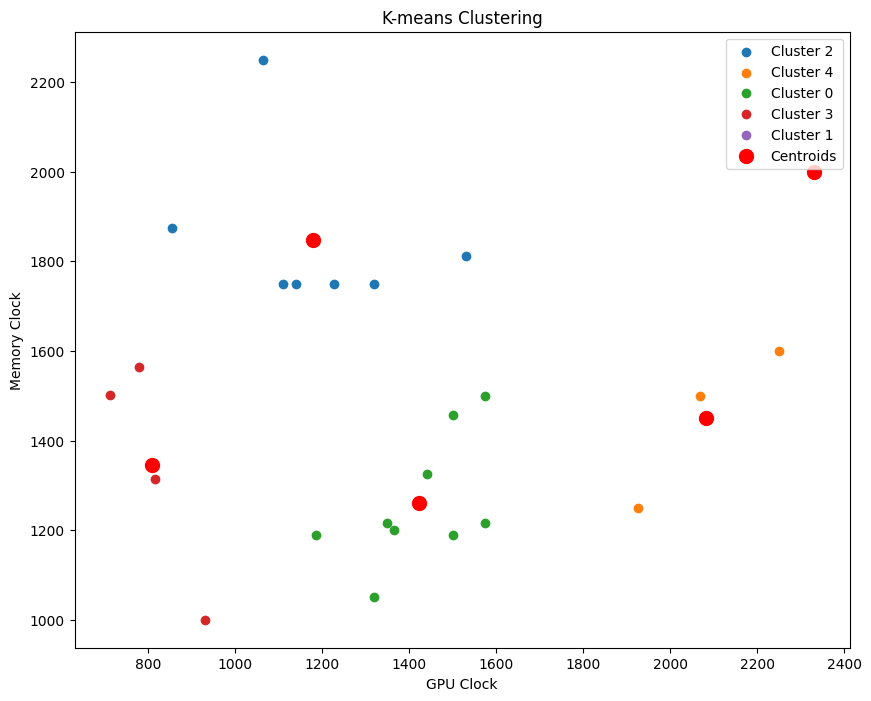

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

# Menyiapkan data
databaru = {
    'gpuClock': [1065, 2068, 1500, 1320, 817, 1440, 930, 1140, 1530, 1350, 1365, 1500, 1228, 1185, 712, 1320, 1110, 1575, 855, 780, 1575, 1925, 2250, 2331],
    'memClock': [2250, 1500, 1188, 1750, 1313, 1325, 1000, 1750, 1812, 1215, 1200, 1458, 1750, 1188, 1502, 1050, 1750, 1500, 1875, 1563, 1215, 1250, 1600, 2000]
}

# Convert the data into a NumPy array
data_array = np.array(list(databaru.values())).T

# Membuat objek KMeans dengan 5 kluster dan random state 0
kmeans = KMeans(n_clusters=5, random_state=0)

# Melakukan klastering pada data
labels = kmeans.fit_predict(data_array)

# Membuat dataframe dengan kolom 'gpuClock' dan 'memClock'
df = pd.DataFrame(databaru, columns=['gpuClock', 'memClock'])

# Menambahkan kolom 'label' yang berisi hasil klastering
df['label'] = labels

# Visualisasi hasil klastering
plt.figure(figsize=(10, 8))

# Menggunakan scatter plot untuk memvisualisasikan data dalam setiap kluster
for label in df['label'].unique():
    cluster_data = df[df['label'] == label]
    plt.scatter(cluster_data['gpuClock'], cluster_data['memClock'], label=f'Cluster {label}')

# Menambahkan centroid kluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('GPU Clock')
plt.ylabel('Memory Clock')
plt.legend()
plt.show()

Output : **K-Means Clustering**

Plot yang dihasilkan akan menunjukkan scatter plot di mana setiap titik diwarnai sesuai dengan klaster yang ditetapkan. Anda akan melihat lima klaster yang berbeda, dan titik-titik merah mewakili pusat-pusat massa klaster tersebut. Sumbu x mewakili 'GPU Clock', sumbu y mewakili 'Memory Clock', dan setiap klaster diberi label. Plot ini memberikan representasi visual tentang bagaimana data dikelompokkan ke dalam klaster berdasarkan fitur 'gpuClock' dan 'memClock'.